In [84]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()

file1 = "Resources/Hot 100 Audio Features.csv"
file2 = "Resources/Hot Stuff.csv"

audio_features = pd.read_csv(file1)
hot100 = pd.read_csv(file2)

merge_df = pd.merge(audio_features, hot100, on=["Song", "Performer", "SongID"], how="outer")

merge_df = merge_df.drop(["SongID", "spotify_track_id", "spotify_track_preview_url",
                         "spotify_track_album", "spotify_track_explicit", "time_signature",
                        "url", "key", "mode", "acousticness", "liveness"], axis=1)
merge_df

,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,loudness,speechiness,instrumentalness,valence,tempo,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,"Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,0.623,80.002,10/5/2019,86.0,1.0,NaN,86.0,1.0
1,"Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,0.623,80.002,10/12/2019,98.0,1.0,86.0,86.0,2.0
2,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/29/2019,100.0,1.0,NaN,100.0,1.0
3,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/6/2019,93.0,1.0,100.0,93.0,2.0
4,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2019,95.0,1.0,93.0,93.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322868,Jackie DeShannon,Vanilla Ólay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/22/1972,76.0,1.0,80.0,76.0,8.0
322869,Jackie DeShannon,Vanilla Ólay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/29/1972,76.0,1.0,76.0,76.0,9.0
322870,XXXTENTACION,Everybody Dies In Their Nightmares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2018,42.0,2.0,NaN,42.0,5.0
322871,XXXTENTACION,Everybody Dies In Their Nightmares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/7/2018,46.0,2.0,42.0,42.0,6.0


In [85]:
# fill (or change) any NaNs to 0
merge_df.fillna(0)

,Performer,Song,spotify_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,loudness,speechiness,instrumentalness,valence,tempo,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,"Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,0.623,80.002,10/5/2019,86.0,1.0,0.0,86.0,1.0
1,"Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],270740.0,91.0,0.734,0.836,-4.803,0.0735,0.000016,0.623,80.002,10/12/2019,98.0,1.0,86.0,86.0,2.0
2,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",0.0,0.0,0.000,0.000,0.000,0.0000,0.000000,0.000,0.000,6/29/2019,100.0,1.0,0.0,100.0,1.0
3,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",0.0,0.0,0.000,0.000,0.000,0.0000,0.000000,0.000,0.000,7/6/2019,93.0,1.0,100.0,93.0,2.0
4,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",0.0,0.0,0.000,0.000,0.000,0.0000,0.000000,0.000,0.000,7/13/2019,95.0,1.0,93.0,93.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322868,Jackie DeShannon,Vanilla Ólay,0,0.0,0.0,0.000,0.000,0.000,0.0000,0.000000,0.000,0.000,7/22/1972,76.0,1.0,80.0,76.0,8.0
322869,Jackie DeShannon,Vanilla Ólay,0,0.0,0.0,0.000,0.000,0.000,0.0000,0.000000,0.000,0.000,7/29/1972,76.0,1.0,76.0,76.0,9.0
322870,XXXTENTACION,Everybody Dies In Their Nightmares,0,0.0,0.0,0.000,0.000,0.000,0.0000,0.000000,0.000,0.000,6/30/2018,42.0,2.0,0.0,42.0,5.0
322871,XXXTENTACION,Everybody Dies In Their Nightmares,0,0.0,0.0,0.000,0.000,0.000,0.0000,0.000000,0.000,0.000,7/7/2018,46.0,2.0,42.0,42.0,6.0


In [86]:
# get columns that have to deal with speechiness and instrumentalness
speech_vs_instruments = merge_df[['Performer', 'Song', 'spotify_genre', 'speechiness', 'instrumentalness', 
                       'WeekID', 'Week Position', 'Previous Week Position', 'Peak Position',
                       'Weeks on Chart']]

# drop any values that do not have speechiness or instrumentalism
speech_vs_instruments = speech_vs_instruments.dropna(how="any")
speech_vs_instruments

,Performer,Song,spotify_genre,speechiness,instrumentalness,WeekID,Week Position,Previous Week Position,Peak Position,Weeks on Chart
1,"Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],0.0735,0.000016,10/12/2019,98.0,86.0,86.0,2.0
19,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",0.0308,0.000000,12/1/2018,23.0,24.0,5.0,8.0
20,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",0.0308,0.000000,2/2/2019,24.0,24.0,5.0,17.0
21,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",0.0308,0.000000,2/9/2019,16.0,24.0,5.0,18.0
22,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",0.0308,0.000000,12/29/2018,44.0,39.0,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...
320908,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",0.0290,0.000000,7/3/1965,32.0,42.0,32.0,6.0
320909,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",0.0290,0.000000,7/10/1965,29.0,32.0,29.0,7.0
320910,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",0.0290,0.000000,7/17/1965,28.0,29.0,28.0,8.0
320911,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",0.0290,0.000000,7/24/1965,32.0,28.0,28.0,9.0


In [87]:
# describe data
speech_vs_instruments.describe()

,speechiness,instrumentalness,Week Position,Previous Week Position,Peak Position,Weeks on Chart
count,252967.000000,252967.000000,252967.000000,252967.000000,252967.000000,252967.000000
mean,0.070882,0.027704,46.425494,46.800476,36.278641,10.173003
std,0.077307,0.123897,27.721144,27.907179,26.903889,7.522200
min,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,0.032000,0.000000,23.000000,22.000000,11.000000,5.000000
50%,0.041200,0.000004,45.000000,46.000000,33.000000,8.000000
75%,0.066700,0.000376,69.000000,70.000000,58.000000,14.000000
max,0.924000,0.982000,100.000000,100.000000,100.000000,87.000000


In [88]:
# create df of peak position
songs_peak = speech_vs_instruments.sort_values(by="Peak Position")

# drop any duplicates
songs_peak = songs_peak.drop_duplicates(["Song"], keep="last")
songs_peak

,Performer,Song,spotify_genre,speechiness,instrumentalness,WeekID,Week Position,Previous Week Position,Peak Position,Weeks on Chart
53629,Drake,In My Feelings,"['canadian hip hop', 'canadian pop', 'hip hop'...",0.1250,0.000060,11/10/2018,23.0,23.0,1.0,18.0
298150,Justin Bieber,What Do You Mean?,"['canadian pop', 'dance pop', 'pop', 'post-tee...",0.0922,0.000898,1/23/2016,8.0,5.0,1.0,19.0
52698,Baauer,Harlem Shake,"['bass trap', 'brostep', 'electronic trap', 'v...",0.0483,0.001820,6/1/2013,50.0,38.0,1.0,14.0
52782,Drake,God's Plan,"['canadian hip hop', 'canadian pop', 'hip hop'...",0.1090,0.000083,5/12/2018,3.0,2.0,1.0,15.0
52790,Drake,Nice For What,"['canadian hip hop', 'canadian pop', 'hip hop'...",0.0705,0.000109,8/4/2018,6.0,4.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...
211600,Jonas Blue Featuring Dakota,Fast Car,"['dance pop', 'edm', 'pop', 'tropical house', ...",0.0544,0.000000,4/9/2016,100.0,100.0,100.0,2.0
211514,Larry Williams & Johnny Watson,"Mercy, Mercy, Mercy","['doo-wop', 'rhythm and blues', 'rock-and-roll...",0.0889,0.000314,3/4/1967,100.0,100.0,100.0,2.0
264914,Chilliwack,Crazy Talk,"['album rock', 'canadian indie', 'classic cana...",0.0335,0.000385,1/11/1975,100.0,100.0,100.0,3.0
211536,B.B. King,Get Off My Back Woman,"['blues', 'blues rock', 'classic rock', 'elect...",0.0370,0.000019,9/6/1969,100.0,100.0,100.0,2.0


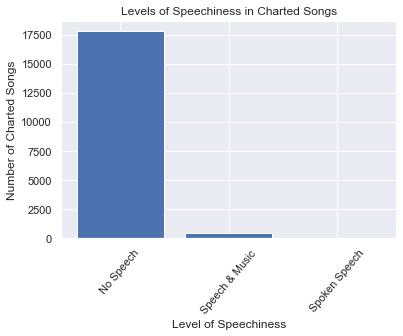

In [89]:
# Create bar graphs to show the three categories of speechiness
no_speech1 = songs_peak.loc[songs_peak["speechiness"] < .33]
no_speech_songs1 = no_speech1["Song"].count()

words_and_music1 = songs_peak.loc[(songs_peak["speechiness"] >= 0.33) & (songs_peak["speechiness"] <.67)]
words_and_music_songs1 = words_and_music1["Song"].count()

spoken_words1 = songs_peak.loc[songs_peak["speechiness"] > .66]
spoken_words_songs1 = spoken_words1["Song"].count()

x_axis1 = [1,2,3]
y_axis1 = [no_speech_songs1, words_and_music_songs1, spoken_words_songs1]

plt.bar(x_axis1, y_axis1, align="center")
plt.title("Levels of Speechiness in Charted Songs")
plt.xticks([1,2,3], ["No Speech", "Speech & Music", "Spoken Speech"], rotation=50)
plt.xlabel("Level of Speechiness")
plt.ylabel("Number of Charted Songs")
plt.savefig("Images/NumSongsVsSpeehiness(Bar).png");

In [90]:
def regress(x,y):
    import scipy.stats as st
    from scipy.stats import linregress
    corr = st.pearsonr(x, y)
    corr1 = corr[0]
    rsquare = round(corr1**2,6)
    print(f"The r-squared is: {rsquare}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    print(f"The regression line is: {line_eq}")

The r-squared is: 0.006903
The regression line is: y = 0.0x + 0.06


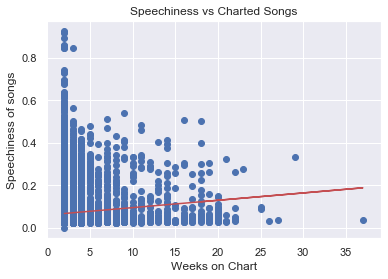

In [91]:
# plot speechiness by num. of weeks on charts
weeks_on_chart = songs_peak["Weeks on Chart"]
weeks_speechi = songs_peak["speechiness"]

plt.xlabel("Weeks on Chart")
plt.ylabel("Speechiness of songs")
plt.title("Speechiness vs Charted Songs")
regress(weeks_on_chart, weeks_speechi)
plt.scatter(weeks_on_chart, weeks_speechi)
plt.savefig("Images/WeeksOnChartVsSpeehiness(Scatter).png");


The r-squared is: 0.00475
The regression line is: y = -0.0x + 0.09


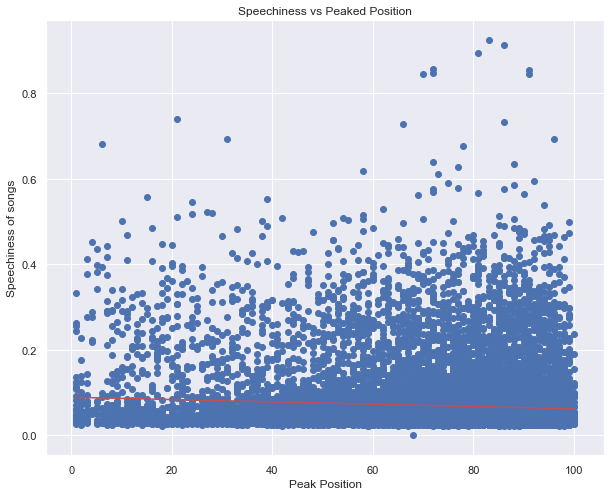

In [92]:
# speechiness vs peak position
peaked_speechi = songs_peak["speechiness"]
peaked_position = songs_peak["Peak Position"]

plt.xlabel("Peak Position")
plt.ylabel("Speechiness of songs")
plt.title("Speechiness vs Peaked Position")
regress(peaked_position, peaked_speechi)
plt.scatter(peaked_position, peaked_speechi);
plt.gcf().set_size_inches(10,8)
plt.savefig("Images/PeakedPosVsSpeehiness(Scatter).png");

The r-squared is: 0.000374
The regression line is: y = -0.0x + 0.04


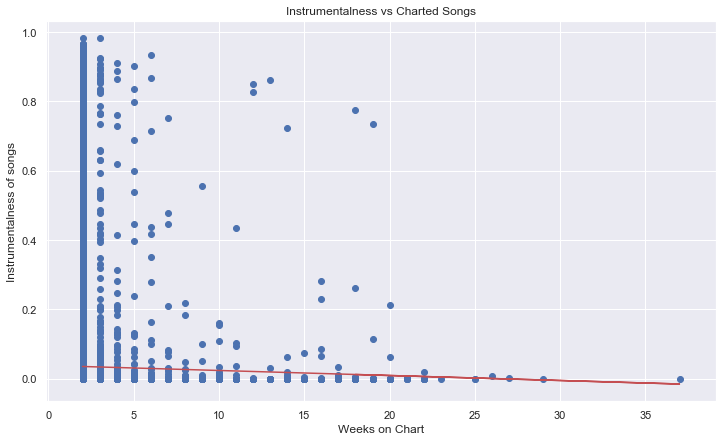

In [93]:
# plot instrumentalness by num. of weeks on charts
weeks_on_chart = songs_peak["Weeks on Chart"]
weeks_instrumental = songs_peak["instrumentalness"]

plt.xlabel("Weeks on Chart")
plt.ylabel("Instrumentalness of songs")
plt.title("Instrumentalness vs Charted Songs")
regress(weeks_on_chart, weeks_instrumental)
plt.scatter(weeks_on_chart, weeks_instrumental)
plt.gcf().set_size_inches(12,7)
plt.savefig("Images/WeeksonChartsVsInstrumentalness(Scatter).png");

The r-squared is: 0.002183
The regression line is: y = 0.0x + 0.01


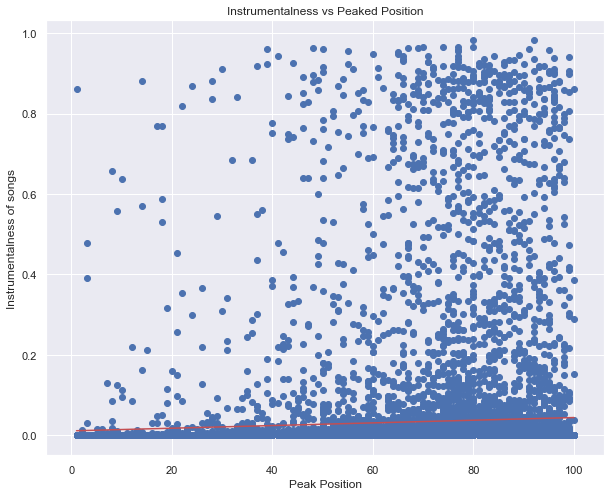

In [94]:
# instrumentalness vs peak position
peaked_instrum = songs_peak["instrumentalness"]
peaked_position = songs_peak["Peak Position"]

plt.xlabel("Peak Position")
plt.ylabel("Instrumentalness of songs")
plt.title("Instrumentalness vs Peaked Position")
regress(peaked_position, peaked_instrum)
plt.scatter(peaked_position, peaked_instrum);
plt.gcf().set_size_inches(10,8)
plt.savefig("Images/PeakedPosVsInstrumentalness(Scatter).png");

In [95]:
# we only want data from the songs that are/were in the top 40
top_fourty = songs_peak.loc[songs_peak['Peak Position'] <= 40, :]
top_fourty

,Performer,Song,spotify_genre,speechiness,instrumentalness,WeekID,Week Position,Previous Week Position,Peak Position,Weeks on Chart
53629,Drake,In My Feelings,"['canadian hip hop', 'canadian pop', 'hip hop'...",0.1250,0.000060,11/10/2018,23.0,23.0,1.0,18.0
298150,Justin Bieber,What Do You Mean?,"['canadian pop', 'dance pop', 'pop', 'post-tee...",0.0922,0.000898,1/23/2016,8.0,5.0,1.0,19.0
52698,Baauer,Harlem Shake,"['bass trap', 'brostep', 'electronic trap', 'v...",0.0483,0.001820,6/1/2013,50.0,38.0,1.0,14.0
52782,Drake,God's Plan,"['canadian hip hop', 'canadian pop', 'hip hop'...",0.1090,0.000083,5/12/2018,3.0,2.0,1.0,15.0
52790,Drake,Nice For What,"['canadian hip hop', 'canadian pop', 'hip hop'...",0.0705,0.000109,8/4/2018,6.0,4.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...
113217,The Bangles,Eternal Flame,"['album rock', 'dance rock', 'europop', 'jangl...",0.0243,0.000000,2/11/1989,40.0,56.0,40.0,2.0
149895,Ace Of Base,Don't Turn Around,"['bubblegum dance', 'dance pop', 'eurodance', ...",0.0755,0.387000,5/14/1994,40.0,61.0,40.0,2.0
112043,Belinda Carlisle,I Get Weak,"['australian pop', 'dance pop', 'dance rock', ...",0.0289,0.000000,1/23/1988,40.0,54.0,40.0,2.0
112008,Huey Lewis & The News,I Know What I Like,"['album rock', 'classic rock', 'dance rock', '...",0.0305,0.000015,4/11/1987,40.0,54.0,40.0,2.0


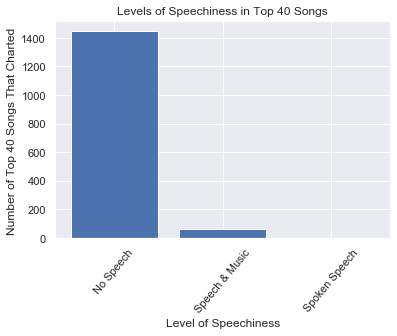

In [96]:
# Create bar graphs to show the three categories of speechiness
no_speech = top_fourty.loc[top_fourty["speechiness"] < .33]
no_speech_songs = no_speech["Song"].count()

words_and_music = top_fourty.loc[(top_fourty["speechiness"] >= 0.33) & (top_fourty["speechiness"] <.67)]
words_and_music_songs = words_and_music["Song"].count()

spoken_words = top_fourty.loc[top_fourty["speechiness"] > .66]
spoken_words_songs = spoken_words["Song"].count()

x_axis = [1,2,3]
y_axis = [no_speech_songs, words_and_music_songs, spoken_words_songs]

plt.bar(x_axis, y_axis, align="center")
plt.title("Levels of Speechiness in Top 40 Songs")
plt.xticks([1,2,3], ["No Speech", "Speech & Music", "Spoken Speech"], rotation=50)
plt.xlabel("Level of Speechiness")
plt.ylabel("Number of Top 40 Songs That Charted ")
plt.savefig("Images/NumOfTop40SongsVsSpeechiness(Bar).png");

In [97]:
only_speechi_song = spoken_words["Song"]
only_speechi_song

6627              ATM
23036     8 Out Of 10
109735       Mr. Jaws
Name: Song, dtype: object

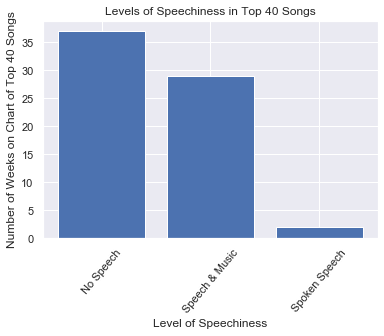

In [98]:
# Create bar graphs to show the three categories of speechiness
no_speech2 = top_fourty.loc[top_fourty["speechiness"] < .33]
no_speech_weeks = no_speech2["Weeks on Chart"].max()

words_and_music2 = top_fourty.loc[(top_fourty["speechiness"] >= 0.33) & (top_fourty["speechiness"] <.67)]
words_and_music_weeks = words_and_music2["Weeks on Chart"].max()

spoken_words2 = top_fourty.loc[top_fourty["speechiness"] > .66]
spoken_words_weeks = spoken_words2["Weeks on Chart"].max()

x_axis = [1,2,3]
y_axis = [no_speech_weeks, words_and_music_weeks, spoken_words_weeks]

plt.bar(x_axis, y_axis, align="center")
plt.title("Levels of Speechiness in Top 40 Songs")
plt.xticks([1,2,3], ["No Speech", "Speech & Music", "Spoken Speech"], rotation=50)
plt.xlabel("Level of Speechiness")
plt.ylabel("Number of Weeks on Chart of Top 40 Songs")
plt.savefig("Images/NumOfWeeksOfTop40SongsVsSpeechiness(Bar).png");

In [99]:
def regress(x,y):
    import scipy.stats as st
    from scipy.stats import linregress
    corr = st.pearsonr(x, y)
    corr1 = corr[0]
    rsquare = round(corr1**2,6)
    print(f"The r-squared is: {rsquare}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    print(f"The regression line is: {line_eq}")

The r-squared is: 0.005258
The regression line is: y = 0.0x + 0.09


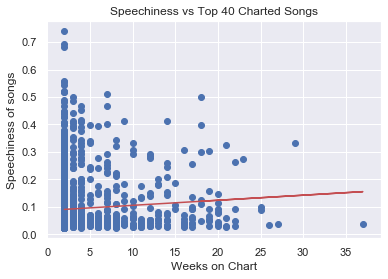

In [100]:
# plot speechiness by num. of weeks on charts on Top 40
weeks_on_chart1 = top_fourty["Weeks on Chart"]
weeks_speechi1 = top_fourty["speechiness"]

plt.xlabel("Weeks on Chart")
plt.ylabel("Speechiness of songs")
plt.title("Speechiness vs Top 40 Charted Songs")
regress(weeks_on_chart1, weeks_speechi1)
plt.scatter(weeks_on_chart1, weeks_speechi1)
plt.savefig("Images/NumOfTop40SongsVsSpeechiness(Scatter).png");


The r-squared is: 0.018691
The regression line is: y = -0.0x + 0.13


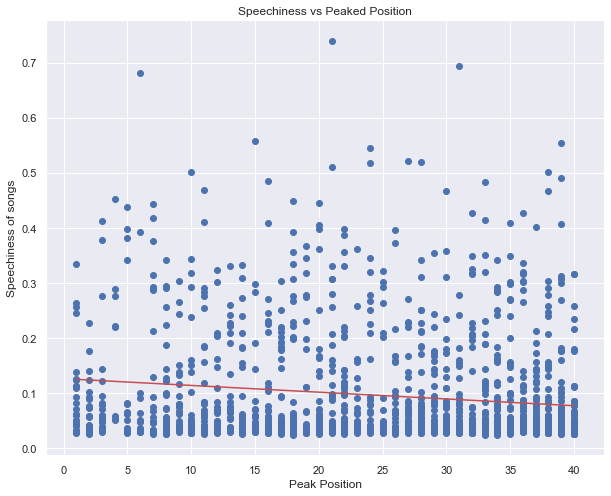

In [101]:
# speechiness vs peak position
peaked_speechi1 = top_fourty["speechiness"]
peaked_position1 = top_fourty["Peak Position"]

plt.xlabel("Peak Position")
plt.ylabel("Speechiness of songs")
plt.title("Speechiness vs Peaked Position")
regress(peaked_position1, peaked_speechi1)
plt.scatter(peaked_position1, peaked_speechi1);
plt.gcf().set_size_inches(10,8);
plt.savefig("Images/PeakedPosTop40VsSpeechiness(Scatter).png");

The r-squared is: 0.001226
The regression line is: y = -0.0x + 0.02


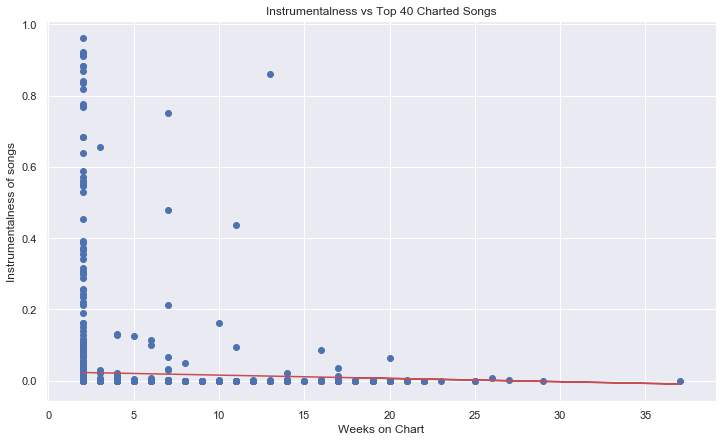

In [102]:
# plot instrumentalness by num. of weeks on charts
weeks_on_chart1 = top_fourty["Weeks on Chart"]
weeks_instrumental1 = top_fourty["instrumentalness"]

plt.xlabel("Weeks on Chart")
plt.ylabel("Instrumentalness of songs")
plt.title("Instrumentalness vs Top 40 Charted Songs")
regress(weeks_on_chart1, weeks_instrumental1)
plt.scatter(weeks_on_chart1, weeks_instrumental1)
plt.gcf().set_size_inches(12,7);
plt.savefig("Images/NumOfTop40SongsVsInstrumentalness(Scatter).png");


The r-squared is: 9.9e-05
The regression line is: y = 0.0x + 0.02


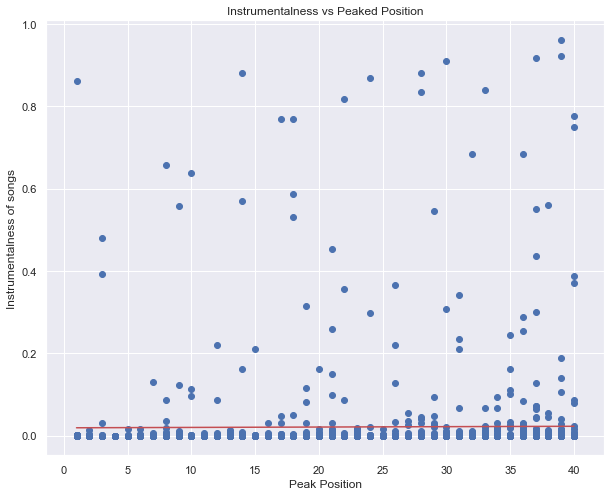

In [103]:
# instrumentalness vs peak position
peaked_instrum1 = top_fourty["instrumentalness"]
peaked_position1 = top_fourty["Peak Position"]

plt.xlabel("Peak Position")
plt.ylabel("Instrumentalness of songs")
plt.title("Instrumentalness vs Peaked Position")
regress(peaked_position1, peaked_instrum1)
plt.scatter(peaked_position1, peaked_instrum1);
plt.gcf().set_size_inches(10,8);
plt.savefig("Images/PeakedPosTop40VsInstrumentalness(Scatter).png");


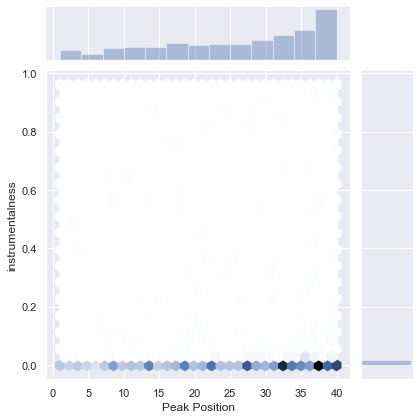

In [104]:
top_40_instrument= sns.jointplot(x="Peak Position", y="instrumentalness", data=top_fourty, kind="hex")
plt.savefig("Images/HeatMap_InstrumentalnessVsSpeechiness.png");


The r-squared is: 0.003993
The regression line is: y = -0.07x + 0.03


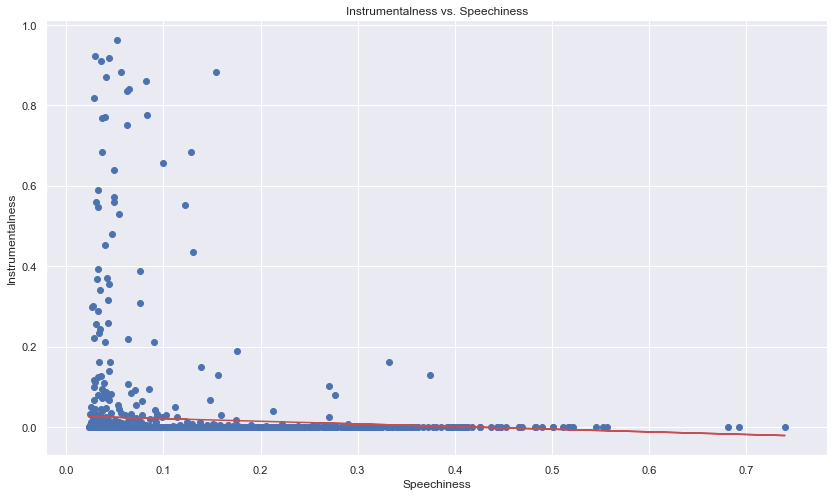

In [105]:
plt.title(f"Instrumentalness vs. Speechiness")
regress(top_fourty["speechiness"], top_fourty["instrumentalness"])
plt.xlabel(f"Speechiness")
plt.ylabel(f"Instrumentalness")
plt.scatter(top_fourty["speechiness"], top_fourty["instrumentalness"]);
plt.gcf().set_size_inches(14,8)
plt.savefig("Images/Scatter_InstrumentalnessVsSpeechiness.png");


In [106]:
not_top_fourty = songs_peak.loc[songs_peak['Peak Position'] >= 40, :]
not_top_fourty

,Performer,Song,spotify_genre,speechiness,instrumentalness,WeekID,Week Position,Previous Week Position,Peak Position,Weeks on Chart
66557,Chicago,Alive Again,"['adult standards', 'album rock', 'classic roc...",0.0450,0.008520,10/28/1978,40.0,63.0,40.0,2.0
8611,Curtis Mayfield,Superfly,"['chicago soul', 'classic soul', 'disco', 'fun...",0.1100,0.000075,11/25/1972,40.0,83.0,40.0,2.0
47725,Da Brat,Give It 2 You,"['chicago rap', 'hip hop', 'hip pop', 'new jac...",0.1790,0.000000,4/22/1995,40.0,77.0,40.0,2.0
73427,Connie Francis,Second Hand Love,"['adult standards', 'brill building pop', 'eas...",0.0296,0.000000,5/19/1962,40.0,75.0,40.0,2.0
158862,Paul Anka,It's Time To Cry,"['adult standards', 'brill building pop', 'can...",0.0325,0.000000,11/28/1959,40.0,74.0,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...
211600,Jonas Blue Featuring Dakota,Fast Car,"['dance pop', 'edm', 'pop', 'tropical house', ...",0.0544,0.000000,4/9/2016,100.0,100.0,100.0,2.0
211514,Larry Williams & Johnny Watson,"Mercy, Mercy, Mercy","['doo-wop', 'rhythm and blues', 'rock-and-roll...",0.0889,0.000314,3/4/1967,100.0,100.0,100.0,2.0
264914,Chilliwack,Crazy Talk,"['album rock', 'canadian indie', 'classic cana...",0.0335,0.000385,1/11/1975,100.0,100.0,100.0,3.0
211536,B.B. King,Get Off My Back Woman,"['blues', 'blues rock', 'classic rock', 'elect...",0.0370,0.000019,9/6/1969,100.0,100.0,100.0,2.0
